In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline  

import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.externals import joblib

sys.path.append('..')
from plotting import get_cubehelix_palette, get_line_style

/mnt/home/snakoneczny/tools/anaconda3/envs/python3-gpu/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 100

sns.set(style='ticks')
sns.set_palette('cubehelix')

In [4]:
def plot_histories(history_top, history_rnd, idx_start=0, title=None, y_label=None):
    color_palette = get_cubehelix_palette(2)
    linewidth = 1.5

    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    
    ax1.set_xlabel('number of trees')
    ax1.set_ylabel(y_label)
    
    to_plot = [
        (history_top, 'test top, r > 21.3', ax1),
        (history_random, 'test random, r < 21.3', ax2),
    ]
    
    plotted_arr = []
    for i, (data, label, ax) in enumerate(to_plot):    
        color = color_palette[i]
        linestyle = get_line_style(i)
        plotted, = ax.plot(np.arange(idx_start, len(data)), data[idx_start:], color=color,
                           label=label, linestyle=linestyle, linewidth=linewidth)
        ax.tick_params(axis='y', labelcolor=color)

        plotted_arr.append(plotted)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    legend = plt.legend(handles=plotted_arr, loc='upper right')
    plt.title(title)
    plt.show()

# XGBoost classification

In [14]:
# xgb_clf = joblib.load('../outputs/exp_models/KiDS_DR4_x_SDSS_DR14_xgb_f-all_test-magnitude__2019-12-05_12:32:30.joblib')

xgb_clf = joblib.load('../outputs/exp_models/KiDS_DR4_x_SDSS_DR14_xgb_f-all_test-magnitude__2020-02-10_13:37:02.joblib')

In [15]:
history_top = xgb_clf.evals_result()['validation_1']['merror']
history_random = xgb_clf.evals_result()['validation_0']['merror']

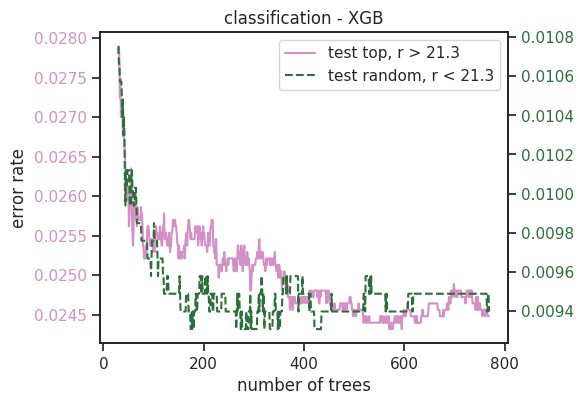

In [19]:
plot_histories(history_top, history_random, idx_start=30, title='classification - XGB',
               y_label='error rate')

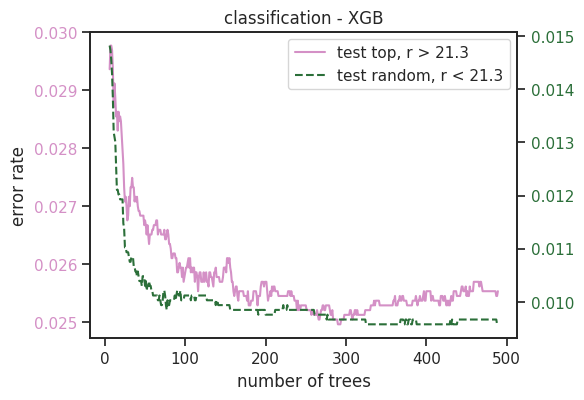

In [7]:
plot_histories(history_top, history_random, idx_start=6, title='classification - XGB',
               y_label='error rate')

# XGBoost redshift QSO

In [8]:
xgb_z_qso = joblib.load('../outputs/exp_models/KiDS_DR4_x_SDSS_DR14_xgb_f-all_test-magnitude_spec-qso__2019-12-05_16:21:55.joblib')

[15:40:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [9]:
history_top = xgb_z_qso.evals_result()['validation_1']['rmse']
history_random = xgb_z_qso.evals_result()['validation_0']['rmse']

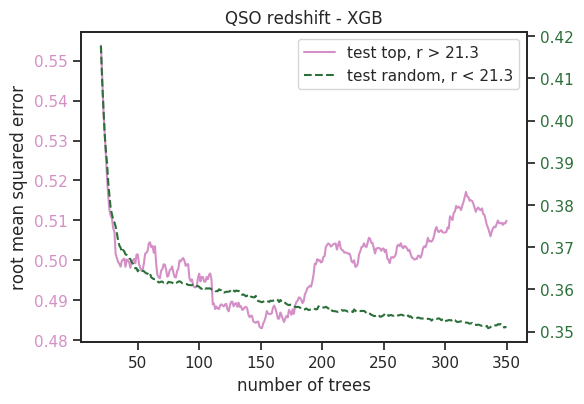

In [10]:
plot_histories(history_top, history_random, idx_start=20, title='QSO redshift - XGB',
               y_label='root mean squared error')

# XGBoost redshift galaxy

In [11]:
model_z_galaxy = joblib.load('../outputs/exp_models/KiDS_DR4_x_SDSS_DR14_xgb_f-all_test-magnitude_spec-galaxy__2019-12-05_16:23:09.joblib')

[15:41:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [12]:
history_top = model_z_galaxy.evals_result()['validation_1']['rmse']
history_random = model_z_galaxy.evals_result()['validation_0']['rmse']

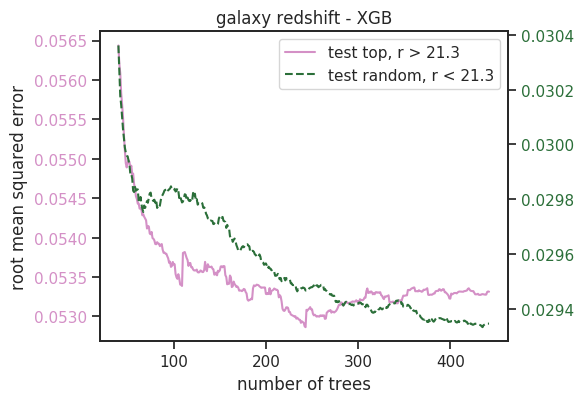

In [13]:
plot_histories(history_top, history_random, idx_start=40, title='galaxy redshift - XGB',
               y_label='root mean squared error')